## MODEL TRAINING

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### IMPORT THE CSV DATA INTO PANDAS DATAFRAME

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math_score'],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variable:",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [8]:
y=df['math_score']

In [9]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### ENCODE THE CATEGORICAL VARIABLES

In [11]:
# Create Column Transformer with 3 types of transformers
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer([
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features),
])


OneHotEncoder: Converts categorical variables into binary (0/1) columns.

StandardScaler: Standardizes numerical features by removing the mean and scaling to unit variance.

ColumnTransformer: Applies different transformers to different columns.

In [12]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
X=preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,r2_square

#### Training the model with types of regression

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store results
model_list = []
train_r2_list = []
test_r2_list = []
test_rmse_list = []
test_mae_list = []

# Iterate over models
for model_name, model in models.items():
    try:
        model.fit(X_train, y_train)

        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate
        train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
        test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

        # Store results
        model_list.append(model_name)
        train_r2_list.append(train_r2)
        test_r2_list.append(test_r2)
        test_rmse_list.append(test_rmse)
        test_mae_list.append(test_mae)

        # Print results
        print(f" {model_name}")
        print(" Training Performance")
        print(f"- MAE: {train_mae:.4f}")
        print(f"- RMSE: {train_rmse:.4f}")
        print(f"- R² Score: {train_r2:.4f}")
        print("Test Performance")
        print(f"- MAE: {test_mae:.4f}")
        print(f"- RMSE: {test_rmse:.4f}")
        print(f"- R² Score: {test_r2:.4f}")
        print("="*40)

    except Exception as e:
        print(f" Error in model: {model_name}")
        print(f" Exception: {e}")
        print("="*40)

# Create summary DataFrame
results_df = pd.DataFrame({
    "Model": model_list,
    "Train R²": train_r2_list,
    "Test R²": test_r2_list,
    "Test RMSE": test_rmse_list,
    "Test MAE": test_mae_list
})

# Display results
print("\n Summary of Model Performance:\n")
print(results_df.sort_values(by="Test R²", ascending=False).reset_index(drop=True))

 Linear Regression
 Training Performance
- MAE: 4.2715
- RMSE: 28.4013
- R² Score: 0.8740
Test Performance
- MAE: 4.2222
- RMSE: 29.4326
- R² Score: 0.8790
 Lasso
 Training Performance
- MAE: 5.2063
- RMSE: 43.4784
- R² Score: 0.8071
Test Performance
- MAE: 5.1579
- RMSE: 42.5064
- R² Score: 0.8253
 Ridge
 Training Performance
- MAE: 4.2650
- RMSE: 28.3378
- R² Score: 0.8743
Test Performance
- MAE: 4.2111
- RMSE: 29.0563
- R² Score: 0.8806
 K-Neighbors Regressor
 Training Performance
- MAE: 4.5168
- RMSE: 32.5799
- R² Score: 0.8555
Test Performance
- MAE: 5.6210
- RMSE: 52.6066
- R² Score: 0.7838
 Decision Tree
 Training Performance
- MAE: 0.0187
- RMSE: 0.0781
- R² Score: 0.9997
Test Performance
- MAE: 6.2200
- RMSE: 62.5300
- R² Score: 0.7430
 Random Forest
 Training Performance
- MAE: 1.8207
- RMSE: 5.1742
- R² Score: 0.9770
Test Performance
- MAE: 4.7095
- RMSE: 36.4796
- R² Score: 0.8501
 XGBRegressor
 Training Performance
- MAE: 0.6875
- RMSE: 1.0146
- R² Score: 0.9955
Test Perfo

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
7,CatBoost Regressor,0.851632
5,Random Forest,0.851153
8,AdaBoost Regressor,0.845753
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.757334


In [23]:
from sklearn.metrics import r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

print("Model Accuracies (R² Score in %):")
print("="*40)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred) * 100
    print(f"{name:<25} : {score:.2f} %")


Model Accuracies (R² Score in %):
Linear Regression         : 87.90 %
Lasso                     : 82.53 %
Ridge                     : 88.06 %
K-Neighbors Regressor     : 78.38 %
Decision Tree             : 72.70 %
Random Forest Regressor   : 85.24 %
XGBRegressor              : 82.78 %
CatBoosting Regressor     : 85.16 %
AdaBoost Regressor        : 84.28 %


### Plot y_pred and y_test

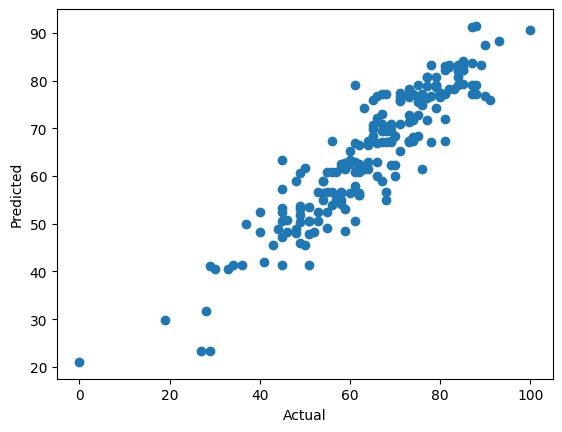

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

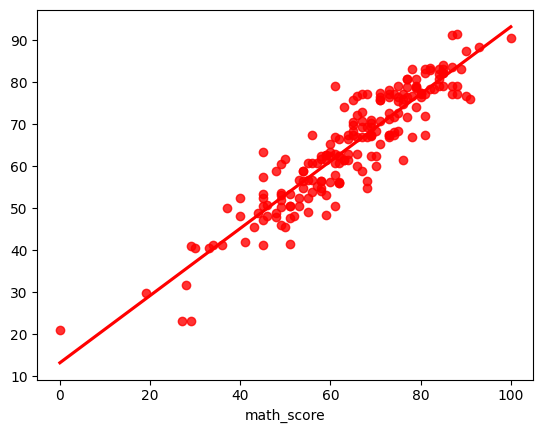

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

### Differences between actual values and predicted values

In [26]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.026667,14.973333
737,53,56.669118,-3.669118
740,80,77.404959,2.595041
660,74,77.251852,-3.251852
411,84,82.000000,2.000000
...,...,...,...
408,52,48.257732,3.742268
332,62,56.368421,5.631579
208,74,67.456140,6.543860
613,65,67.426357,-2.426357
